In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_l, x_r, y_b, y_t = 0, 1, 0, 1
nx, ny = 512, 512
dx, dy = (x_r - x_l) / nx, (y_t - y_b) / ny

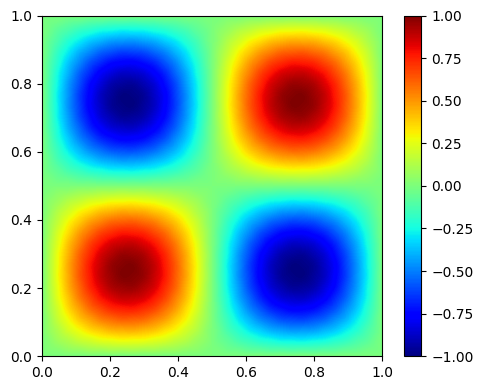

In [2]:
x, y = np.linspace(x_l, x_r, nx + 1), np.linspace(y_b, y_t, nx + 1)
# initial condition
u, f = np.zeros((ny + 1, nx + 1)), np.zeros((ny + 1, nx + 1))
for i in range(ny + 1): # for y
    for j in range(nx +1): # for x
        u[i, j] = np.sin(2 * np.pi * x[j]) * np.sin(2 * np.pi * y[i]) + (1 / 16**2) * np.sin(32 * np.pi * x[j]) * np.sin(32 * np.pi * y[i])
        f[i, j] = -8 * np.pi**2 * np.sin(2 * np.pi * x[j]) * np.sin(2 * np.pi * y[i]) - 8 * np.pi**2 * np.sin(32 * np.pi * x[j]) * np.sin(32 * np.pi * y[i])
        
plt.figure(figsize=(5, 4), dpi=100)
plt.imshow(u, extent=[0, 1, 0, 1], cmap="jet", origin="lower")
plt.colorbar()
plt.tight_layout()

In [3]:
kx, ky = np.zeros(nx), np.zeros(ny)
data, data1 = np.zeros((ny, nx), dtype=complex), np.zeros((ny, nx), dtype=complex)

def ps_fft():
    eps = 1e-6
    aa, bb, cc = -2 / dx**2 - 2 / dy**2, 2 / dx**2, 2 / dy**2
    hx = 2 * np.pi / nx
    for i in range(int(nx / 2)):
        kx[i] = hx * i
        kx[i + int(nx / 2)] = hx * (i - int(nx / 2))
    
    kx[0] = eps
    ky = kx.copy()
    
    for i in range(ny): # for y
        for j in range(nx): # for x
            data[i, j] = complex(f[i,j], 0)
    e = np.fft.fft2(data)
    e[0, 0] = 0.0

    for i in range(ny): # for y
        for j in range(nx): # for x
            data1[i, j] = e[i, j] / (aa + bb * np.cos(kx[j]) + cc * np.cos(ky[i]))
    return np.fft.ifft2(data1).real

In [4]:
un = np.zeros((ny + 1, nx + 1))
un[1:, 1:] = ps_fft()
un[-1, :] = un[0, :]
un[:, -1] = un[:, 0]

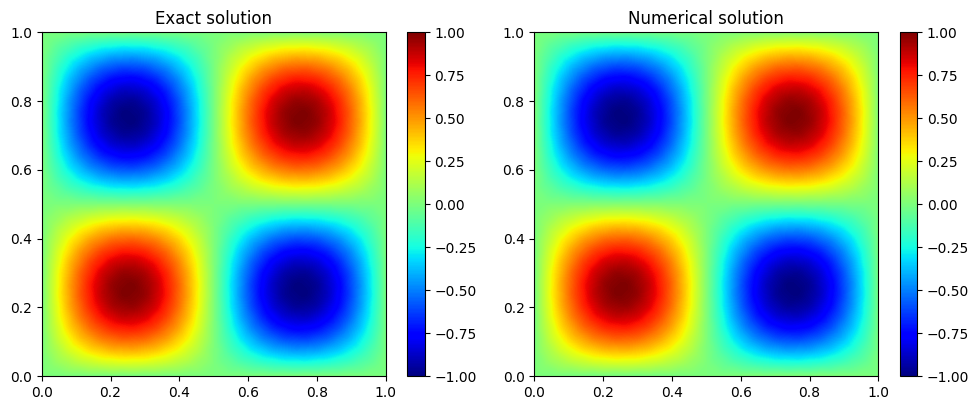

In [5]:
titles = ("Exact solution", "Numerical solution")

plt.figure(figsize=(10, 4), dpi=100)
for i, result in enumerate([u, un]):
    plt.subplot(1, 2, i+1)
    plt.imshow(result, extent=[0, 1, 0, 1], cmap="jet", origin="lower")
    plt.colorbar()
    plt.title(titles[i])
plt.tight_layout()